In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import seaborn as sns
import folium
import folium.plugins as plugins
import warnings
warnings.filterwarnings("ignore")
import datetime
import time 

%matplotlib inline

In [2]:
df1 = pd.read_csv('business.csv')
df2 = pd.read_csv('review.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [5]:
#Check for null values
df1.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

In [6]:
df2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [7]:
df1.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [8]:
df2.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [9]:
df1.categories.unique()

array([ 'Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists',
       "Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas",
       'Departments of Motor Vehicles;Public Services & Government', ...,
       "Martial Arts;Sports Wear;Men's Clothing;Sporting Goods;Kickboxing;Fitness/Exercise Equipment;Fitness & Instruction;Boxing;Fashion;Shopping;Active Life",
       'Pizza;Event Planning & Services;Italian;Caterers;Restaurants',
       'Hair Salons;Nail Technicians;Nail Salons;Eyelash Service;Beauty & Spas;Barbers;Makeup Artists'], dtype=object)

In [62]:
#Annotating labels for plots
def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column (or else, change ylim)
        #if p_height > 0.95:
        #    label_position = height - (y_height * 0.05)
        #else:
        #    label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

### How many different business categories are there?

In [11]:
categories = pd.concat([pd.Series(row['business_id'], row['categories'].split(';')) for _, row in df1.iterrows()]).reset_index()
categories.columns = ['b_categories', 'business_id']
categories.head()

b_categories             business_id
0           Dentists  FYWN1wneV18bWNgQjJ2GNg
1  General Dentistry  FYWN1wneV18bWNgQjJ2GNg
2   Health & Medical  FYWN1wneV18bWNgQjJ2GNg
3      Oral Surgeons  FYWN1wneV18bWNgQjJ2GNg
4  Cosmetic Dentists  FYWN1wneV18bWNgQjJ2GNg

In [12]:
print('There are',categories['b_categories'].nunique(),'unique business categories')

There are 1294 unique business categories


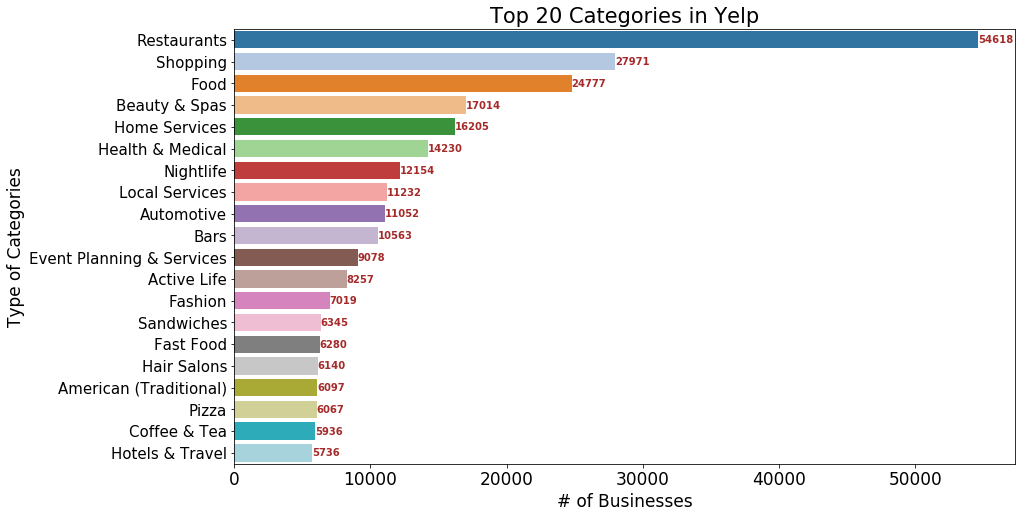

In [13]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-pastel')

cat=categories['b_categories'].value_counts().to_frame()[:20]
ax=sns.barplot(cat['b_categories'],cat.index, palette = 'tab20')


plt.title('Top 20 Categories in Yelp', fontsize=21)
plt.ylabel('Type of Categories', fontsize=17)
plt.xlabel('# of Businesses',fontsize=17)
plt.xticks(size = 17)
plt.yticks(size = 15)

#print labels
for i, v in enumerate(cat.b_categories):
    ax.text(v + 10, i + .15, str(v), color='brown', fontweight='bold')

plt.show()

## From here on, we only focus on the 'Restaurants' category of the Yelp dataset

In [14]:
#Extracts data that contains the 'Restaurants' label in categories
dfr=df1[df1.categories.str.contains('Restaurants')]

In [15]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54618 entries, 4 to 174558
Data columns (total 13 columns):
business_id     54618 non-null object
name            54618 non-null object
neighborhood    24519 non-null object
address         54618 non-null object
city            54618 non-null object
state           54618 non-null object
postal_code     54517 non-null object
latitude        54618 non-null float64
longitude       54618 non-null float64
stars           54618 non-null float64
review_count    54618 non-null int64
is_open         54618 non-null int64
categories      54618 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 5.8+ MB


In [16]:
#Converts all 'city' strings to uppercase
dfr.city = dfr.city.astype(str).str.upper()

In [17]:
len(dfr['city'].unique())

764

In [18]:
dfr.loc[dfr['city'].str.contains('TORNTO')]

business_id           name neighborhood  \
120676  I9dtHZMPnhgatLqni6EJrA  "Wahlburgers"          NaN   

                                                  address    city state  \
120676  "Toronto Pearson International Airport, Termin...  TORNTO    ON   

       postal_code   latitude  longitude  stars  review_count  is_open  \
120676     L5P 1B2  43.678335 -79.611824    2.5           122        1   

                                               categories  
120676  American (New);Burgers;American (Traditional);...

In [19]:
#Upon inspection, there are NORTH & SOUTH LAS VEGAS which we recategorize as LAS VEGAS
#Similarly, there is NORTH TORONTO and a typo error of 'TORNTO' and we combine them as TORONTO
dfr.loc[dfr['city'].str.contains('LAS VEGAS'), 'city'] = 'LAS VEGAS'
dfr.loc[(dfr['city'].str.contains('NORTH TORONTO')) | (dfr['city'].str.contains('TORNTO')),'city'] = 'TORONTO'
dfr.loc[(dfr['city'].str.contains('MONTREAL')) & (dfr['state'].str.contains('QC')),'city'] = 'MONTRÉAL'

### Distribution of star ratings amongst the Restaurants category

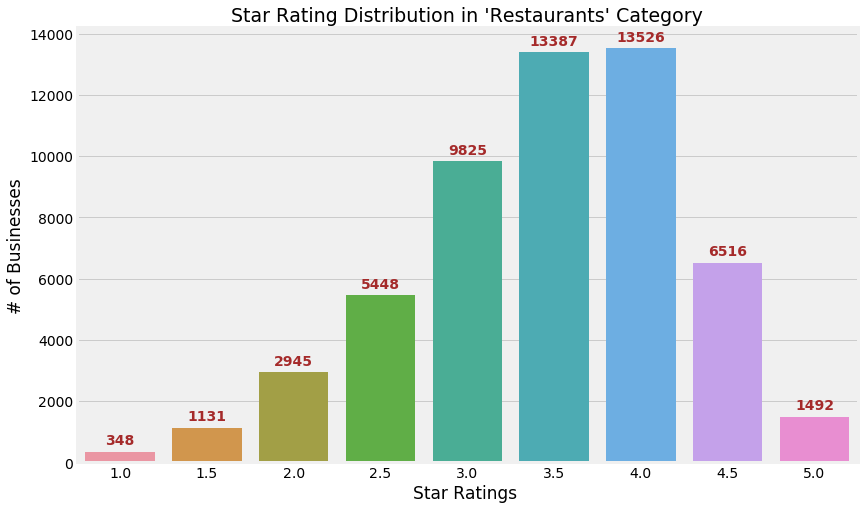

In [20]:
plt.figure(figsize=(14,8))
plt.style.use('fivethirtyeight')
kwargs = {'fontsize': 14, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'brown'}

x=dfr['stars'].value_counts()
ax= sns.barplot(x.index, x.values)

x_val = [348, 1131, 2945, 5448, 9825, 13387, 13526, 6516, 1492]
annotate_labels(ax, x_val, **kwargs)

plt.title("Star Rating Distribution in 'Restaurants' Category", fontsize=19)
plt.ylabel('# of Businesses', fontsize=17)
plt.xlabel('Star Ratings ', fontsize=17)

plt.show()

### Let's see which cities has the most restaurant reviews

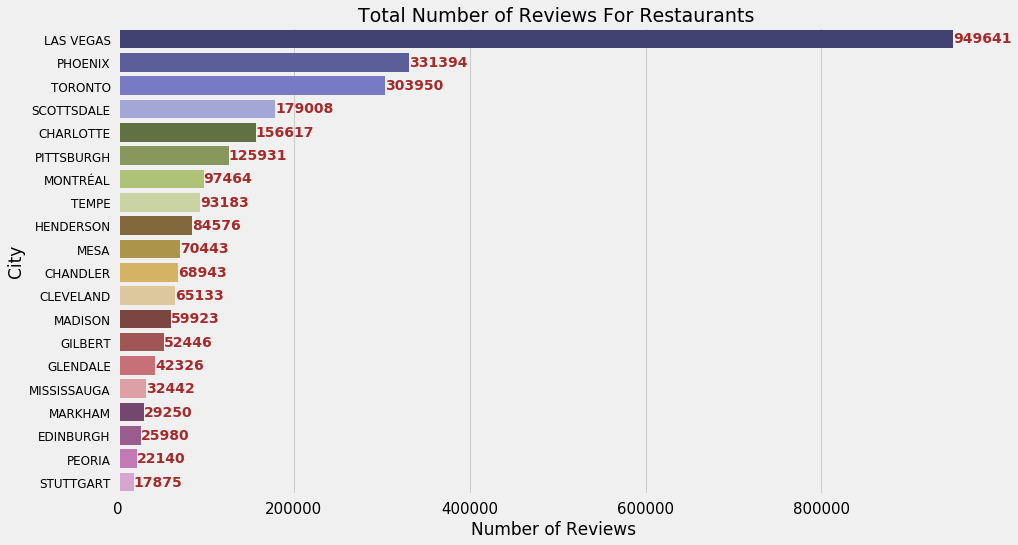

In [21]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-notebook')

dfr_review=dfr.groupby(['city','business_id'])['review_count'].sum().to_frame()
dfr_review_plt=dfr_review.groupby(level='city').sum().sort_values(by='review_count',ascending=False)[:20]

ax = sns.barplot(dfr_review_plt['review_count'], dfr_review_plt.index, palette='tab20b')


plt.title("Total Number of Reviews For Restaurants", fontsize=19)
plt.ylabel('City', fontsize=17)
plt.xlabel('Number of Reviews ', fontsize=17)
plt.xticks(size=15)
plt.yticks(size=12)

for i, v in enumerate(dfr_review_plt['review_count']):
    ax.text(v + 10, i + .15, str(v), color='brown', fontweight='bold')

plt.show()

## Heatmaps of restaurants in Toront, Montréal and Mississauga!

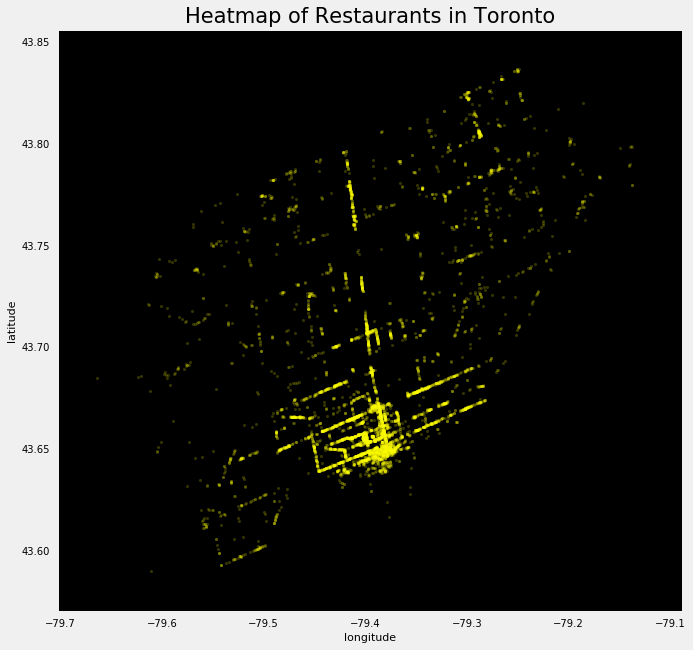

In [22]:
t= dfr[dfr['city'] == 'TORONTO']
ax1=t.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2, s=7, color='yellow', figsize=(10,10))

#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
ax1.set_title('Heatmap of Restaurants in Toronto',size=21)
ax1.set_facecolor('black')
ax1.set_xlim([t.longitude.min(), t.longitude.max()+0.05])
ax1.set_ylim([t.latitude.min()-0.02, t.latitude.max()-0.02])
ax1.grid(False)

plt.show()

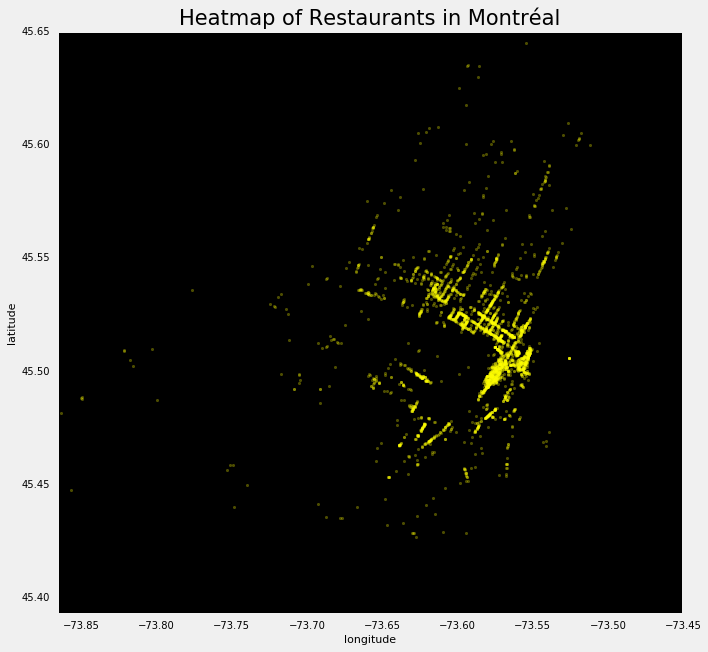

In [23]:
mont = dfr[dfr['city'] == 'MONTRÉAL']
ax2=mont.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,s=7, color='yellow', figsize=(10,10))


ax2.set_title('Heatmap of Restaurants in Montréal',size=21)
ax2.set_facecolor('black')
ax2.set_xlim([mont.longitude.min(), -73.45])
ax2.set_ylim([mont.latitude.min(), 45.65])
ax2.grid(False)

plt.show()

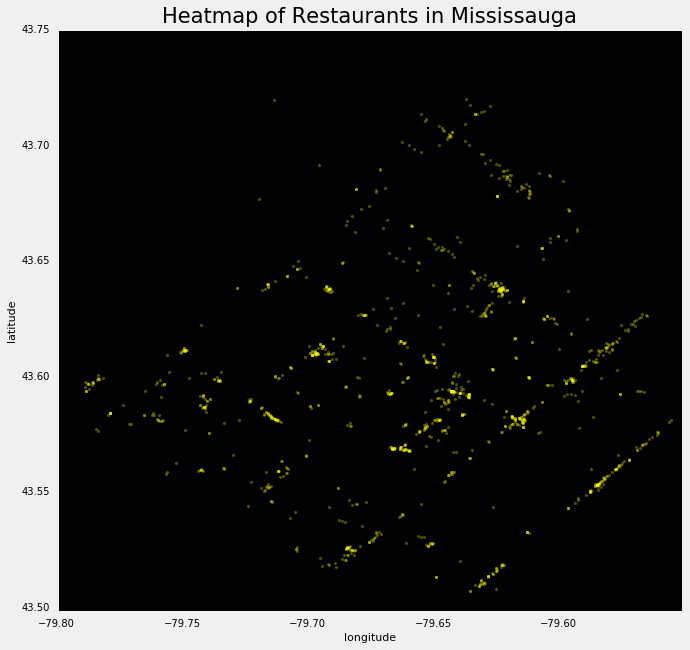

In [24]:
mi = dfr[dfr['city'] == 'MISSISSAUGA']
ax3=mi.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,s=7, color='yellow', figsize=(10,10))


ax3.set_title('Heatmap of Restaurants in Mississauga',size=21)
ax3.set_facecolor('black')
ax3.set_xlim([-79.8, mi.longitude.max()])
ax3.set_ylim([mi.latitude.min(), 43.75])
ax3.grid(False)

plt.show()

### Let's visualize heatmap of restaurants in Toronto based on the star ratings!
* **PLEASE** press the 'LOOP' icon in the slider in the heatmap below
* The index in the slider represents the 1 to 5 star ratings (in increments of 0.5)
* This heatmap shows where the restaurants (between 1 to 5 stars) are concentrated

In [25]:
data=[]
labels=t['stars'].unique().tolist()
#rearranging data to suit the format needed for folium
stars=list(t['stars'].unique())
for i in stars:
    p=t[t['stars']==i]
    data.append(p[['latitude','longitude']].values.tolist())

m = folium.Map(location=[43.733983, -79.357274], tiles="OpenStreetMap", zoom_start=11)
hm = plugins.HeatMapWithTime(data,max_opacity=0.7,auto_play=True,index=labels,display_index=True,radius=8)
hm.add_to(m)
m

### Let's visualize heatmap of restaurants in Montréal based on the star ratings!

In [26]:
data=[]
labels=mont['stars'].unique().tolist()
#rearranging data to suit the format needed for folium
stars=list(mont['stars'].unique())
for i in stars:
    p=mont[mont['stars']==i]
    data.append(p[['latitude','longitude']].values.tolist())

m = folium.Map(location=[45.526440, -73.591630], tiles="OpenStreetMap", zoom_start=11)
hm = plugins.HeatMapWithTime(data,max_opacity=0.7,auto_play=True,index=labels,display_index=True,radius=7)
hm.add_to(m)
m

## Now, let's attempt to predict star ratings of Restaurants based on the text reviews

In [65]:
import re
from textblob import TextBlob
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tqdm import tqdm, tqdm_pandas
import warnings
warnings.filterwarnings("ignore")

##### We first merge two datasets

In [28]:
dfr_m=pd.merge(df2, dfr[['business_id','name','city','state']], on='business_id',how='right')

In [29]:
dfr_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221418 entries, 0 to 3221417
Data columns (total 12 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
name           object
city           object
state          object
dtypes: int64(4), object(8)
memory usage: 319.5+ MB


In [30]:
#check for null values.
dfr_m.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
name           0
city           0
state          0
dtype: int64

In [31]:
#Short summary of merged dataframe 
print('There are',(format (dfr_m.business_id.nunique(),',d')),'unique business')
print('There a total of',(format (dfr_m['stars'].value_counts().sum(), ',d')),'restaurant reviews by',(format (dfr_m.user_id.nunique(),',d')),'unique users')

There are 54,618 unique business
There a total of 3,221,418 restaurant reviews by 908,921 unique users


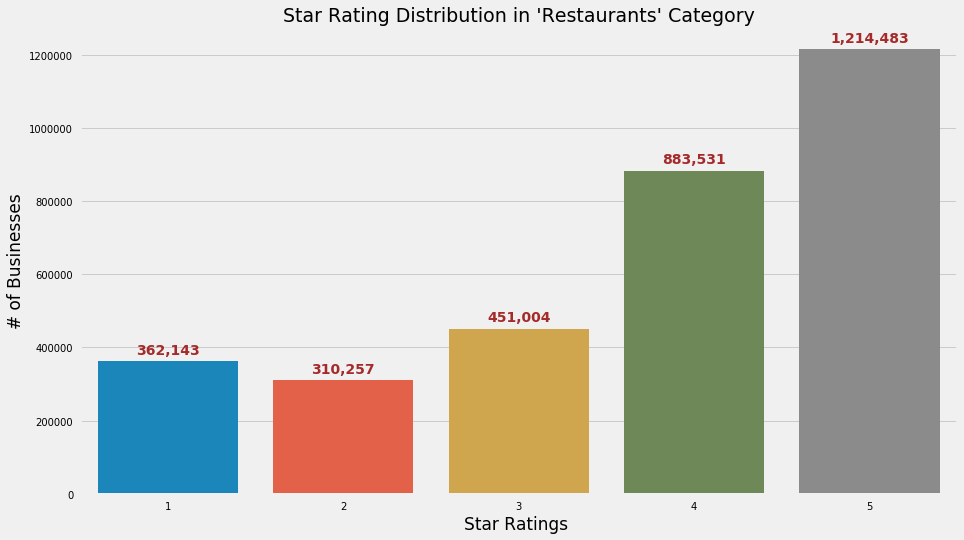

In [32]:
plt.figure(figsize=(14,8))
plt.style.use('fivethirtyeight')
kwargs = {'fontsize': 14, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'brown'}

xm=dfr_m['stars'].value_counts()
ax= sns.barplot(xm.index, xm.values)

xm_val = ['362,143','310,257','451,004','883,531','1,214,483']
annotate_labels(ax, xm_val, **kwargs)

plt.title("Star Rating Distribution in 'Restaurants' Category", fontsize=19)
plt.ylabel('# of Businesses', fontsize=17)
plt.xlabel('Star Ratings ', fontsize=17)

plt.show()

#### Creating to see the distribution of text length of the 1,2,3,4 and 5 star reviews

In [33]:
dfr_m['text_length'] = dfr_m['text'].apply(len)

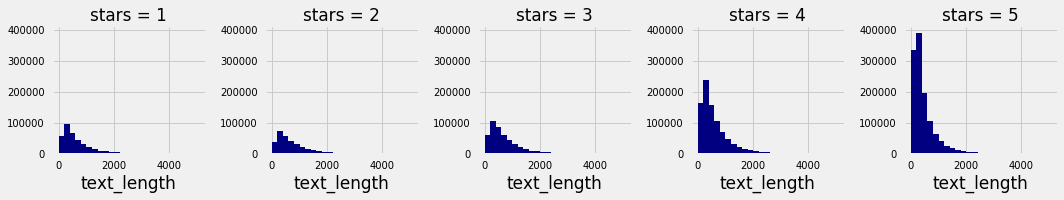

In [34]:
ax3= sns.FacetGrid(data=dfr_m, col='stars')
ax3.map(plt.hist, 'text_length', bins=25, color='navy');


plt.show()

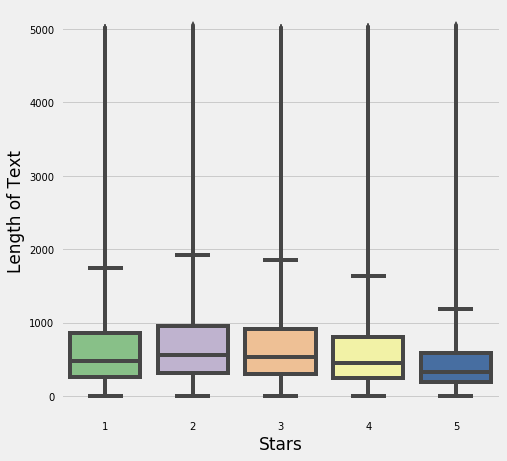

In [35]:
plt.figure(figsize=(7,7))

sns.boxplot(x='stars', y='text_length', data=dfr_m, palette='Accent')

plt.ylabel('Length of Text', fontsize=17)
plt.xlabel('Stars',fontsize=17)

plt.show()

## Creating 2 classes for negative and positive reviews
* Reviews that are 1 and 2 stars will be encoded as a **NEGATIVE review, 0**
* Reviews that are 4 and 5 stars will be encoded as a **POSITIVE review, 1**

In [36]:
filter_method = lambda x: 0 if x < 3 else 1 if (x >3) else None
dfr_m['target'] = dfr_m.stars.apply(filter_method)

### Let's see how many negative and positive reviews we have

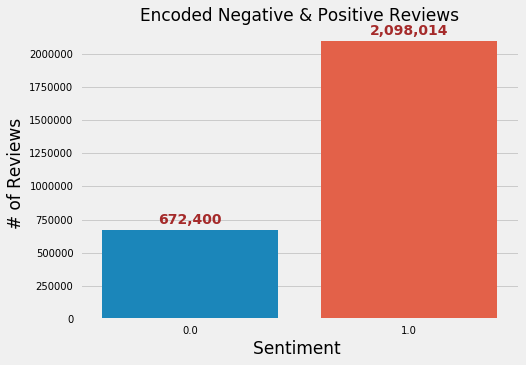

In [37]:
plt.figure(figsize=(7,5))

xc=dfr_m['target'].value_counts()
axc= sns.barplot(xc.index, xc.values)

xc_labels=['672,400','2,098,014']
annotate_labels(axc, xc_labels, **kwargs)

plt.title("Encoded Negative & Positive Reviews", fontsize=17)
plt.ylabel('# of Reviews', fontsize=17)
plt.xlabel('Sentiment ', fontsize=17)

plt.show()

#### As we can see from the bar plot above, we have an unbalanced dataset with about 3:1 positive to negative reviews ratio. To avoid biasness in our analysis, I decided to randomly sample 670,000 reviews from each class.

In [38]:
dfr_nm = dfr_m[['text','target']]
dfc = dfr_nm.groupby('target').apply(lambda s: s.sample(670000)).reset_index(drop=True)
dfc.target = dfc.target.astype(int)
dfc.columns =['reviews','target']

print('Now we have a total of',(format (len(dfc),',d')),'reviews that are distributed equally between 2 classes')

Now we have a total of 1,340,000 reviews that are distributed equally between 2 classes


Before we can use the data, there is one issue that I realized. That is negation words are truncated for example,from can't to can. This change may affect our sentiment analysis. As such, we'll convert negation words into their proper form

## Text pre-processing

In [42]:
tok = WordPunctTokenizer()

#negation dictionary
n_dict = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
n_pattern = re.compile(r'\b(' + '|'.join(n_dict.keys()) + r')\b')

#pronouns_dict = {"i've: i have", "i'm":"i am", "we've: we have","they've: they have"}
#pronouns_pattern = re.compile(r'\b(' + '|'.join(pronouns_dict.keys()) + r')\b')

def clean_preprocess(text):
    """
    Given a string of text, the function:
    1. Remove all punctuations and numbers
    2. Converts texts to lowercase
    3. Handles negation words defined above.
    3. Returns cleaned text
    """
    lower = re.sub(r'[^a-zA-Z\s\']', "", text).lower()
    lower_neg_handled = n_pattern.sub(lambda x: n_dict[x.group()], lower)
    letters_only = re.sub(r'[^a-zA-Z\s]', "", lower_neg_handled)
    words = [i for i  in tok.tokenize(letters_only) if len(i) > 1]
    return (' '.join(words))

def tokenize(df):
    """Get tokens for each review in df. tqdm implemented to show the progress bar"""
    tokens = []
    for i in tqdm(range(len(df.values))):
        tokens.append(clean_preprocess(df.values[i]))
    return tokens


#-----------ALTERNATE USE------------#
stemmer = SnowballStemmer("english") 
stemmer2 = WordNetLemmatizer()

def preprocess(text):
    """
    Given a string of text, the function:
    1. Remove all punctuation
    2. Converts texts to lowercase
    3. Remove all stopwords
    4. Returns a list of lemmatized words (using Snowball Stemmer)
    """
    tokens = [i for i in re.sub(r'[^a-zA-Z\s]', "", text).lower().split() if i not in stopwords.words('english')]
    #' '.join([stemmer.stem(t) for t in tokens])
    
    return [stemmer2.lemmatize(t) for t in tokens]

In [43]:
#Let's store the resampled, processed reviews into a new CSV.
clean_reviews=tokenize(dfc.reviews)

df1 = pd.DataFrame(clean_reviews,columns=['reviews'])
df1['target'] = dfc.target
df1.to_csv('resampled_clean_reviews.csv',encoding='utf-8')

100%|██████████| 1340000/1340000 [04:25<00:00, 5044.53it/s]


In [44]:
df2 = pd.read_csv('resampled_clean_reviews.csv',index_col=0)
df2.head()

reviews  target
0  actually wanted to try the buffet at texas sta...       0
1  rate this as one star the server was the barte...       0
2  gone donw since last time we where here new ow...       0
3  oh how want to like this placeits close to whe...       0
4  recall them years ago that was then flavourles...       0

### Next up, we will perform an EDA on this resampled, cleaned CSV and evaluate different classification algorithms including, logistic regression with unigram, bigram, and trigram (with/without TF-IDF), LinearSVC, Naive-Bayes, Random Forest, and boosting algorithm.